In [1]:
"Ce fichier permet de simuller une antenne ifa avec les parametres optimisés obtenue du script ifa_meander_optimize.py"

'Ce fichier permet de simuller une antenne ifa avec les parametres optimisés obtenue du script ifa_meander_optimize.py'

In [2]:
from utils.ifa_meander_project_v2.geometry import *
from utils.ifa_meander_project_v2.meshing import *
from utils.ifa_meander_project_v2.frequency import *
from utils.ifa_meander_project_v2.simulation import *
from utils.gmsh_function import extract_msh_to_mat
from utils.frequency_sweep import plot_s11_curve

In [3]:
fLow = 700e6
fHigh = 1100e6
fC = 868e6
step = 4e6

frequencies, fc_index, nPoints = generate_frequencies(fLow, fHigh, fC, step)

print(f"Nombre de fréquences (nPoints) : {nPoints}")
print(f"Index de fC : {fc_index}")


Nombre de fréquences (nPoints) : 101
Index de fC : 42


In [4]:
mesh_name = "sim_optimize_ifa.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/sim_optimize_ifa.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

In [5]:
a = 29 / 1000  # Largeur
b = 44 / 1000  # Hauteur

terminal_a = 89 / 1000
terminal_b = b
x_t = np.array([-terminal_a + a, 0, 0, -terminal_a + a])
y_t = np.array([terminal_b, terminal_b, 0, 0])

# On fixe le short feed et la largur de piste
largeur_piste    = 4.4590 / 1000
distance_meandre = 4.4590 / 1000
feed = 22.000 / 1000
feed_point = np.array([0, feed, 0])

# mesh_size = 21.16 / 1000
# mesh_size = 16.20 / 1000

mesh_size = 8.7 / 1000
print(f"Mesh size : {mesh_size * 1000:.2f} mm")

Mesh size : 8.70 mm


In [6]:
def creation_ifa(largeur, hauteur, width, dist_meandre, feed, x_t, y_t, save_mesh_folder, mesh_name, mesh_size):
    x, y, N, distance_meandre = ifa_creation(largeur, hauteur, width, dist_meandre)
    x_m, y_m = trace_meander(x, y, width)
    feed_wid = width # La largeur de la piste est la meme partout
    feed_x = np.array([0, distance_meandre, distance_meandre, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, mesh_size)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)
    return N, distance_meandre

distance meandres 4.459 mm
Largeur de piste ifa 4.459 mm
position feed = 22.0 mm

Number of meanders 3
New distance meandres 5.207666666666667 mm
index_feeding_edges = [70]
voltage[index_feeding_edges] =  [0.0022295+0.j]
Simulation 1/101 | f = 700.00 MHz | S11 = -0.48 dB
index_feeding_edges = [70]
voltage[index_feeding_edges] =  [0.0022295+0.j]
Simulation 2/101 | f = 704.00 MHz | S11 = -0.51 dB
index_feeding_edges = [70]
voltage[index_feeding_edges] =  [0.0022295+0.j]
Simulation 3/101 | f = 708.00 MHz | S11 = -0.55 dB
index_feeding_edges = [70]
voltage[index_feeding_edges] =  [0.0022295+0.j]
Simulation 4/101 | f = 712.00 MHz | S11 = -0.58 dB
index_feeding_edges = [70]
voltage[index_feeding_edges] =  [0.0022295+0.j]
Simulation 5/101 | f = 716.00 MHz | S11 = -0.62 dB
index_feeding_edges = [70]
voltage[index_feeding_edges] =  [0.0022295+0.j]
Simulation 6/101 | f = 720.00 MHz | S11 = -0.66 dB
index_feeding_edges = [70]
voltage[index_feeding_edges] =  [0.0022295+0.j]
Simulation 7/101 | f = 


Image sauvegardée au format PDF : data/fig_image/sim_optimize_ifa_antenna_surface_current_in_radiation_mode.pdf

Simulation 43/101 | f = 868.00 MHz | S11 = -28.50 dB
index_feeding_edges = [70]
voltage[index_feeding_edges] =  [0.0022295+0.j]
Simulation 44/101 | f = 872.00 MHz | S11 = -33.12 dB
index_feeding_edges = [70]
voltage[index_feeding_edges] =  [0.0022295+0.j]
Simulation 45/101 | f = 876.00 MHz | S11 = -23.51 dB
index_feeding_edges = [70]
voltage[index_feeding_edges] =  [0.0022295+0.j]
Simulation 46/101 | f = 880.00 MHz | S11 = -18.85 dB
index_feeding_edges = [70]
voltage[index_feeding_edges] =  [0.0022295+0.j]
Simulation 47/101 | f = 884.00 MHz | S11 = -15.88 dB
index_feeding_edges = [70]
voltage[index_feeding_edges] =  [0.0022295+0.j]
Simulation 48/101 | f = 888.00 MHz | S11 = -13.72 dB
index_feeding_edges = [70]
voltage[index_feeding_edges] =  [0.0022295+0.j]
Simulation 49/101 | f = 892.00 MHz | S11 = -12.06 dB
index_feeding_edges = [70]
voltage[index_feeding_edges] =  [0.002


Image sauvegardée au format PDF (fond transparent, marges minimales) : data/fig_image/ifa_M_opti3_Smith_chart.pdf


📡 Résultats de simulation :
→ Fréquence de résonance = 872.00 MHz
→ Impédance à f_res      = 50.37+2.19j Ω


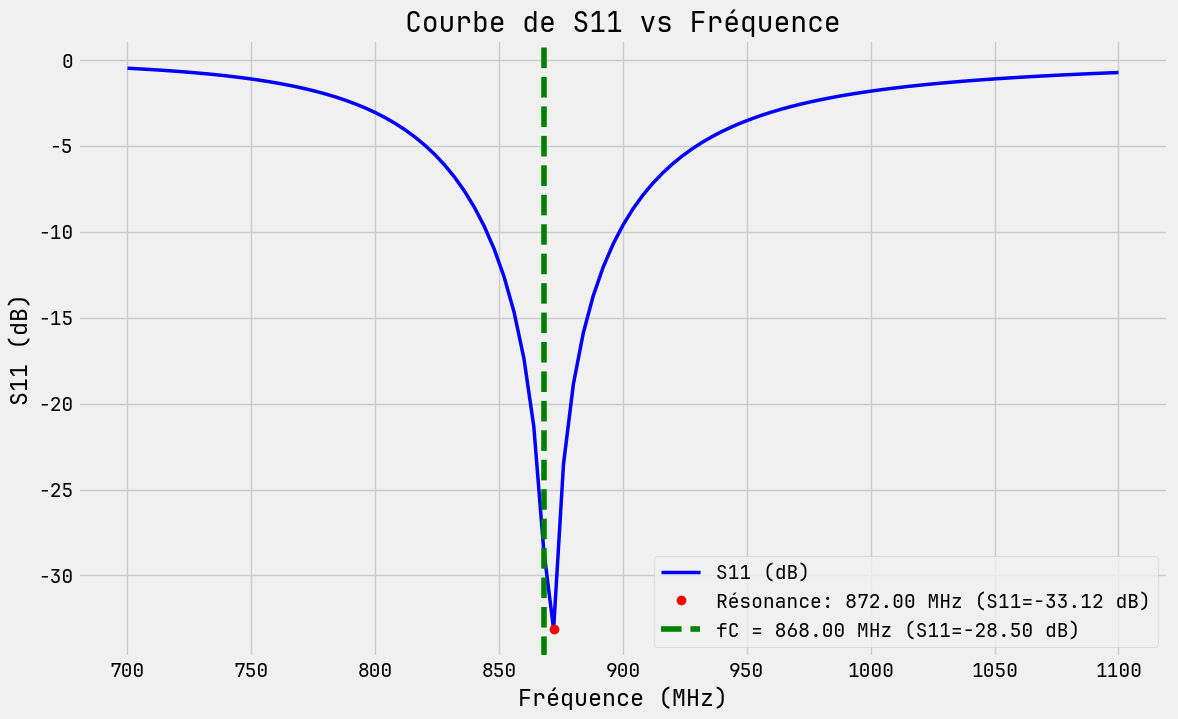

In [7]:
print(f"distance meandres {distance_meandre * 1000} mm")
print(f"Largeur de piste ifa {largeur_piste * 1000} mm")
print(f"position feed = {feed * 1000} mm\n")
N_list_elem, new_distance_meandre_elem = creation_ifa(a, b, largeur_piste, distance_meandre, feed, x_t, y_t, save_mesh_folder, mesh_name, mesh_size)
print(f"Number of meanders {N_list_elem}")
print(f"New distance meandres {new_distance_meandre_elem * 1000} mm")
frequence_resonance, s11_db, R_res, X_res = simulate(frequencies, ifa_meander_mat, fC, feed_point)
plot_s11_curve(s11_db, fLow, fHigh, fC)


In [8]:
# Charger les données CST
cst_data_1 = np.loadtxt("data/plot_file/Plot_S11_Antenne_Ta_89_Tb_44_a_29.txt", skiprows=3)
# cst_data_1 = np.loadtxt("data/plot_file/Plot_S11_Antenne_Ta_92_Tb_55_a_27.txt", skiprows=3)
cst_freq_mhz = cst_data_1[:, 0]  # fréquence déjà en MHz
cst_s11_db = cst_data_1[:, 1]

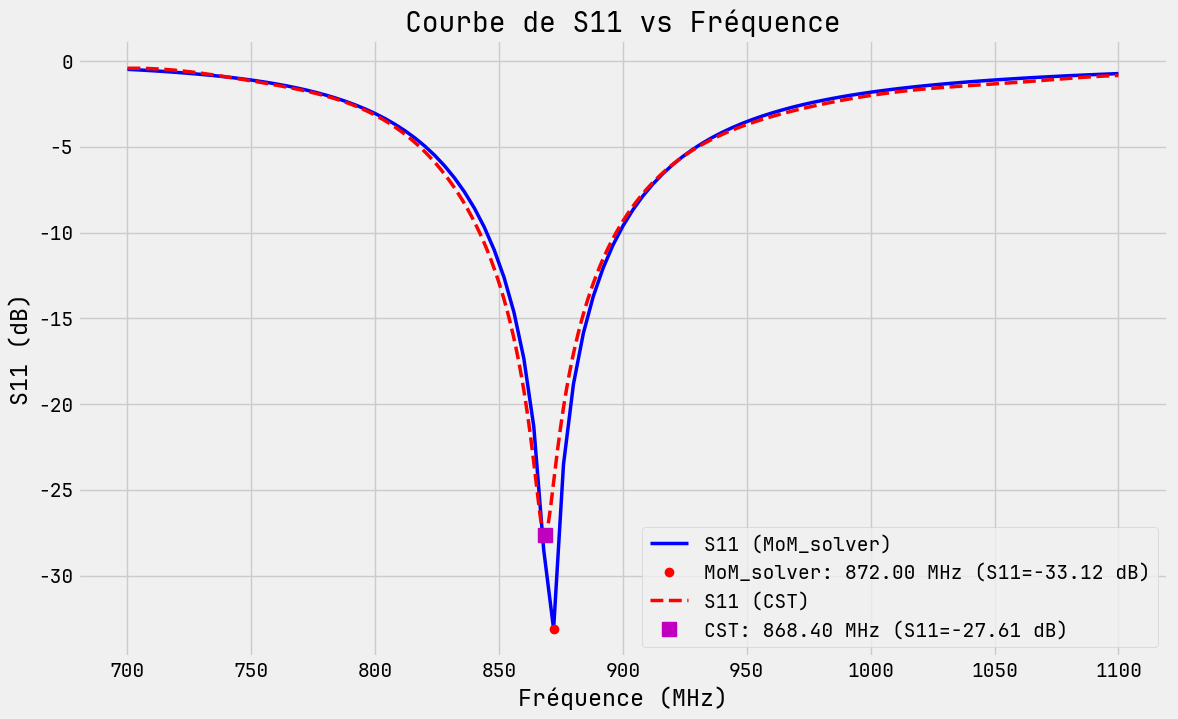

In [9]:
from utils.frequency_sweep import plot_s11_curve_CST_MoM


plot_s11_curve_CST_MoM(s11_db, fLow, fHigh, cst_freq_mhz=cst_freq_mhz, cst_s11_db=cst_s11_db)

# Simulation pour avoir le diagramme de rayonnement

In [10]:
impedance, _ = radiation_algorithm(ifa_meander_mat, 868e6, feed_point)

index_feeding_edges = [70]
voltage[index_feeding_edges] =  [0.004459+0.j]


Calculating radiation intensity distribution over sphere surface...

Frequency = 868000000.0 Hz
Longueur d'onde lambda = 0.34533681334171573 m

Total Power :  0.009705
Gain Linear :  1.558014
Gain Logarithmic :  1.925713 dB

gap_current = (0.018708704282214602+0.0006714006975978822j)
Radiation Resistance :  55.383075 Ohms
Data saved successfully to data/antennas_gain_power/sim_optimize_ifa_gain_power.mat



Image sauvegardée au format PDF : data/fig_image/radiation_intensity_distribution.pdf

Generating antenna directivity pattern...
Data loaded from data/antennas_gain_power/sim_optimize_ifa_gain_power.mat


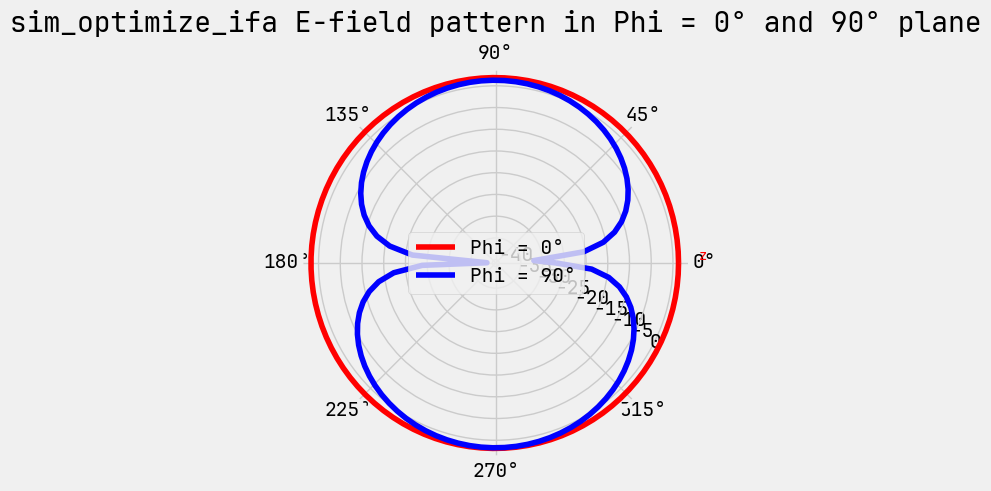

In [11]:
# Étape 2 : Distribution de l'intensité du rayonnement sur une sphère
from efield.efield2 import radiation_intensity_distribution_over_sphere_surface
from efield.efield3 import antenna_directivity_pattern


ifa_meander_mesh2 = 'data/antennas_mesh2/sim_optimize_ifa_mesh2.mat'
ifa_meander_current = 'data/antennas_current/sim_optimize_ifa_current.mat'
ifa_meander_gain_power = 'data/antennas_gain_power/sim_optimize_ifa_gain_power.mat'
filename_sphere_dense = '../../data/sphere_mesh/sphere_dense.mat'

# Étape 2 : Distribution de l'intensité du rayonnement sur une sphère
print("Calculating radiation intensity distribution over sphere surface...")
radiation_intensity_distribution_over_sphere_surface(ifa_meander_mesh2, ifa_meander_current, filename_sphere_dense, radiation=True, save_image=True)

# Étape 3 : Génération du diagramme de directivité
print("Generating antenna directivity pattern...")
antenna_directivity_pattern(ifa_meander_mesh2, ifa_meander_current, ifa_meander_gain_power, radiation=True)